# **Alex's Journal**

**Best Neighborhood in Pittsburgh**: *to be determined*

<u>Metric</u>: Best place to own in dog in Pittsburgh

<u>Databases</u>: *Licenses(mine)*, Supermarkets(Daniel), Housing(Nhu)

The  Dog Licenses database is downloaded and stored as dl. The .head() method was to view the dataset and how the information appears with the column as owner zip codes in a random sample.

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

dl = pd.read_csv("DogLicenses.csv", index_col = "DogName")

In [11]:
dl.sample(5)

,LicenseType,Breed,Color,OwnerZip,ExpYear,ValidDate
DogName,,,,,,
SUMMER,Dog Lifetime Spayed Female,MIXED,WHITE,15044,2099,2014-10-16T14:07:39
FAWN,Dog Senior Lifetime Spayed Female,BLACK&TAN COONHOUND,BLACK/BROWN,15084,2099,2017-02-08T15:35:38
TITAN,Dog Senior Lifetime Neutered Male,DOBERMAN PINSCHER,BLACK/TAN,15238,2099,2013-08-02T14:19:19
JAKE,Dog Senior Lifetime Neutered Male,GER SHORTHAIR POINT,SPOTTED,15090,2099,2019-01-22T15:12:07
FINN,Dog Lifetime Neutered Male,CAV KING CHAR SPANI,WHITE/BROWN,15090,2099,2015-08-11T09:34:08


The describe method was used to see an overview of all of the data in the database.

In [12]:
dl.describe()

,OwnerZip,ExpYear
count,36633.000000,36633.0
mean,15155.909399,2099.0
std,285.835365,0.0
min,15003.000000,2099.0
25%,15101.000000,2099.0
50%,15137.000000,2099.0
75%,15228.000000,2099.0
max,47909.000000,2099.0


Creates a list of city zip codes and names as city_zip with the 28 zip codes.

In [3]:
city_zips = [15201, 15203, 15204, 15205, 15206, 15207, 15208, 15210, 15211,
            15212, 15213, 15214, 15215, 15216, 15217, 15218, 15219, 15220,
            15221, 15222, 15224, 15226, 15227, 15230, 15232, 15233, 15234,
            15235, 15240, 15260, 15282]
len(city_zips)

31

Attempt at trying to filter out zip codes using 28 separate query masks and then attempting to combine them in the next code cell.

In [23]:
query_mask201 = dl['OwnerZip'] == 15201
query_mask203 = dl['OwnerZip'] == 15203
query_mask204 = dl['OwnerZip'] == 15204
query_mask205 = dl['OwnerZip'] == 15205
query_mask206 = dl['OwnerZip'] == 15206
query_mask207 = dl['OwnerZip'] == 15207
query_mask208 = dl['OwnerZip'] == 15208
query_mask210 = dl['OwnerZip'] == 15210
query_mask211 = dl['OwnerZip'] == 15211
query_mask212 = dl['OwnerZip'] == 15212
query_mask213 = dl['OwnerZip'] == 15213
query_mask214 = dl['OwnerZip'] == 15214
query_mask215 = dl['OwnerZip'] == 15215
query_mask216 = dl['OwnerZip'] == 15216
query_mask217 = dl['OwnerZip'] == 15217
query_mask218 = dl['OwnerZip'] == 15218
query_mask219 = dl['OwnerZip'] == 15219
query_mask220 = dl['OwnerZip'] == 15220
query_mask221 = dl['OwnerZip'] == 15221
query_mask222 = dl['OwnerZip'] == 15222
query_mask224 = dl['OwnerZip'] == 15224
query_mask226 = dl['OwnerZip'] == 15226
query_mask227 = dl['OwnerZip'] == 15227
query_mask230 = dl['OwnerZip'] == 15230
query_mask233 = dl['OwnerZip'] == 15233
query_mask234 = dl['OwnerZip'] == 15234 
query_mask235 = dl['OwnerZip'] == 15235

query_mask235.head(15)

DogName
SASHA              False
JAKE               False
SHILOH             False
BLONDIE            False
SASHA              False
CODY               False
CHARLIE            False
COLT               False
CANDY              False
KEENA               True
AMOS               False
BEAR               False
MADISON            False
TENNESEE TUXEDO    False
HOLLY              False
Name: OwnerZip, dtype: bool

This piece was meant to combine the query masks with the combine method accepting list that will result in all query masks being contained within it, the query mask being added currently, and the index of the combined list that currently can be added to.
Code cell results in "DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  ulist.insert(query_mask[i], index)"
  
The code itself takes a longer time to run and will eventually cause an error so method was scrapped for more effective one.

In [4]:
def combine(ulist, query_mask, index):
    for i in query_mask:
        ulist.insert(query_mask[i], index)
        index += 1
        
    return index

index = 0
city_dogs = []
index = combine(city_dogs, query_mask201, index)

NameError: name 'query_mask201' is not defined

When filtered by owner zipcode, the data is presented like this.

In [4]:
dl.groupby("OwnerZip").count()

,LicenseType,Breed,Color,ExpYear,ValidDate
OwnerZip,,,,,
15003,31,31,31,31,31
15005,48,48,48,48,48
15006,7,7,7,7,7
15007,9,9,9,9,9
15012,3,3,3,3,3
...,...,...,...,...,...
16342,1,1,1,1,1
32081,1,1,1,1,1
33426,1,1,1,1,1


More effective way of filtering out non-city zip codes using filter function and list with only zip codes.  The .sample() method shows a random sample of the new function with only city zip codes.

In [5]:
def filter_zips(grouped):
    for i in city_zips:
        if grouped.iloc[0,3] == i:
            return True
    return False
    
pitt_zips = dl.groupby("OwnerZip").filter(filter_zips)
pitt_zips.sample(20)

,LicenseType,Breed,Color,OwnerZip,ExpYear,ValidDate
DogName,,,,,,
DUKE 2,Dog Lifetime Neutered Male,GER SHEPHERD,BLACK/BROWN,15227,2099,2015-03-16T10:43:09
HACHIKO,Dog Lifetime Neutered Male,GOLDEN RETRIEVER,BROWN,15218,2099,2015-10-07T11:15:42
MACKENZIE,Dog Out of County Transfer - Lifetime,YORKSHIRE TERRIER,BLACK/BROWN,15235,2099,2020-11-09T12:22:59
PIPER,Dog Lifetime Spayed Female,BORD COLLIE,WHITE/BLACK,15215,2099,2011-05-18T09:24:09
BOWIE,Dog Lifetime Neutered Male,SFT COAT WHEAT TERR,BLONDE,15234,2099,2020-01-17T15:05:08
JOEY,Dog Lifetime Neutered Male,BORDER TERRIER,WHITE/BLACK,15221,2099,2013-02-20T13:06:10
BARKLY,Dog Lifetime Neutered Male,MIXED,SPOTTED,15220,2099,2007-10-15T09:35:16
SPIKE,Dog Lifetime Duplicate,BLACK&TAN COONHOUND,BLACK/TAN,15235,2099,2020-02-20T14:44:47
BELLA MIA ROSA SPELL,Dog Lifetime Spayed Female,ROTTWEILER,BLACK/BROWN,15205,2099,2016-08-22T13:14:00


.unique() is used to show all of the city zip codes that are present in the dataset.
.value_counts displays how many licenses have been issued in each address with 15235 appearing to have the highest and 15230 and 152304 appearing to have the lowest recorded.

In [25]:
pitt_zips["OwnerZip"].unique()

array([15235, 15215, 15221, 15216, 15227, 15220, 15234, 15218, 15205,
       15233, 15214, 15210, 15226, 15201, 15212, 15222, 15217, 15208,
       15207, 15219, 15203, 15232, 15206, 15213, 15224, 15204, 15230,
       15211])

Histogram showing the zip codes in the city of Pittsburgh on the x-axis and the number of dog licenses presented on the y-axis.  We can see that higher numbered zip codes generally have higher numbers of dog licenses.

In [26]:
pitt_zips["OwnerZip"].value_counts()

15235    1233
15227    1120
15221     500
15205     434
15234     407
15216     337
15215     325
15218     276
15220     235
15214     156
15212      79
15210      70
15226      39
15207      12
15219      12
15217       9
15208       7
15206       6
15201       5
15233       5
15232       5
15203       4
15222       3
15224       2
15213       2
15211       2
15204       1
15230       1
Name: OwnerZip, dtype: int64

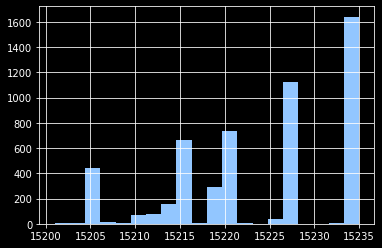

In [34]:
plt.style.use('seaborn-pastel')
pitt_zips['OwnerZip'].hist(bins=20)

There is some general data exploration going on before doing the final calculations for the region.  The pi chart is a representation of the types of licenses within the city.

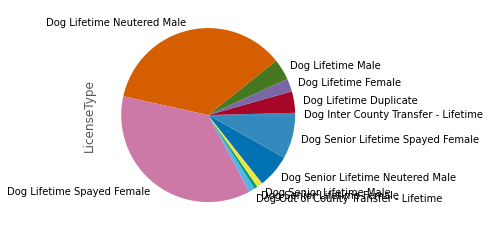

In [27]:
plt.style.use('bmh')
pitt_zips['LicenseType'].value_counts().sort_index().plot.pie(y='LicenseType',
                                                             subplots=False,
                                                             figsize=(8,4))

The graph is an unfiltered bar chart of all of the breeds of dogs within the region, which is unreadable due to the large number of dogs within the area.

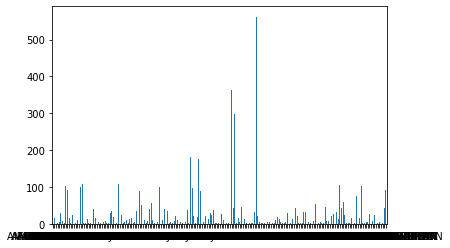

In [12]:
pitt_zips['Breed'].value_counts().sort_index().plot(kind='bar', rot=0)

The code cell has the most popular dog breeds and the amount of each dog breed within the area.

In [23]:
pitt_zips['Breed'].value_counts()

MIXED                  562
LAB MIX                364
LABRADOR RETRIEVER     298
GER SHEPHERD           180
GOLDEN RETRIEVER       175
                      ... 
OTHER                    1
MANCHESTER TERRIER       1
BLACK RUSSIAN TERRI      1
IRISH WOLFHOUND          1
CAROLINA DOG             1
Name: Breed, Length: 204, dtype: int64

The total number of dogs that are within the region is 5287 since every dog license listed in the database expires in 2099.

In [22]:
pitt_zips['ExpYear'].value_counts()

2099    5287
Name: ExpYear, dtype: int64

Rankings is a series that has zip codes and their corresponding rankings.  The rankings are created by dividing by the highest number of dogs within the region to create a percentage.  The percentage can be used to determine which areas are more dog friendly since more dog licenses would indicate a higher likelihood that there is housing or resources for a dog and their owner.

In [36]:
rankings = pitt_zips['OwnerZip'].value_counts() / 1233
rankings

15235    1.000000
15227    0.908354
15221    0.405515
15205    0.351987
15234    0.330089
15216    0.273317
15215    0.263585
15218    0.223844
15220    0.190592
15214    0.126521
15212    0.064071
15210    0.056772
15226    0.031630
15207    0.009732
15219    0.009732
15217    0.007299
15208    0.005677
15206    0.004866
15201    0.004055
15233    0.004055
15232    0.004055
15203    0.003244
15222    0.002433
15224    0.001622
15213    0.001622
15211    0.001622
15204    0.000811
15230    0.000811
Name: OwnerZip, dtype: float64

A bar graph was created to give a visual of the results described above.

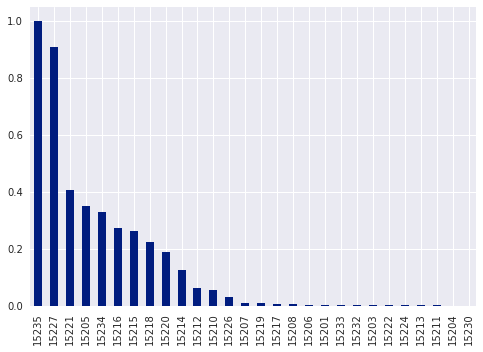

In [39]:
plt.style.use('seaborn-dark-palette')
rankings.plot.bar()

According to the information given by the database, it can be concluded that **15235 is the zip code that is the most dog friendly** based on licensing and **15230 and 15204 are the least dog friendly.**

*15235 contains the Borough of Churchill, Penn Hills and Wilkins Townships, and a part of the city and 15230 contains downtown businesses and 15204 contains part of the city in the areas of Sheraden, Elliott, Esplen, and Broadhead.*

# **Conclusion:**

According to my data, the favorite zipcode of my data is **15235** which includes the Borough of Churchill, Penn Hills and Wilkins Townships, and a part of the city.  This has a significant amount of dog licenses and therefore is considered the most dog friendly in the sense of the ability to license dogs.

My personal favorite neighborhood in Pittsburgh is **Squirell Hill**.

The best neighborhood in Pittsburgh based on group data is **Westwood**.  The zip code for Westwood is **15205**, which makes it my fourth highest ranked.  This ranks fairly high on my list but still disagrees with the personal favorite according to my dataset.